# Linear Regression Exercise `R`

This exercise is going to be a little different in the sense that we won't be guiding in a question-by-question format. Instead, we are going to let you construct a linear model in your choice of `R` or `Python`, whichever you prefer.

The prediction problem is to predict `height` from the `'/dsa/data/all_datasets/stature-hand-foot/stature-hand-foot.csv'` dataset. You can use any variable or combination of variables in order to predict `height`.

You are not going to be graded upon the performance of the model itself, but please approach this as an actual prediction problem. That being said, you should split the data into training and testing sets, in which your model is trained on your training set while the performance is assessed on the testing set. Be sure to predict some output with your testing inputs.

The purpose of this assignment is to demonstrate your ability to use regression to develop a machine learning model. Feel free to include anything that demonstrates your understanding of model development and model refinement including data exploration and even a written description of your reasoning. 

Like always, feel free to ask questions along the way if you get stuck at any point. We are more than happy to help!

To add execution cells, click in this cell.
Then, in the notebook menu: `Insert > Insert Cell Below`

In [12]:
# Read in libraries

library(dplyr)
library(caret)
library(ggplot2)

In [2]:
# Then we need to read in the dataset

df <- read.csv('/dsa/data/all_datasets/stature-hand-foot/stature-hand-foot.csv')

head(df)

gender,height,hand.length,foot.length
<int>,<dbl>,<dbl>,<dbl>
1,1760.2,208.6,269.6
1,1730.1,207.6,251.3
1,1659.6,173.2,193.6
1,1751.3,258.0,223.8
1,1780.6,212.3,282.1
1,1818.3,213.4,268.0


Now we have an idea of the data we are working with and we can begin to build the model.

Let's try first foot.length and see what that predicts

In [4]:
frmla <- height ~ foot.length

In [5]:
# Trian the model

m1 <- train(frmla, df, method = "lm")
summary(m1)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-114.270  -22.007   -4.401   17.094  229.729 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 566.0328    48.3199   11.71   <2e-16 ***
foot.length   4.4620     0.1934   23.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.53 on 153 degrees of freedom
Multiple R-squared:  0.7767,	Adjusted R-squared:  0.7752 
F-statistic:   532 on 1 and 153 DF,  p-value: < 2.2e-16


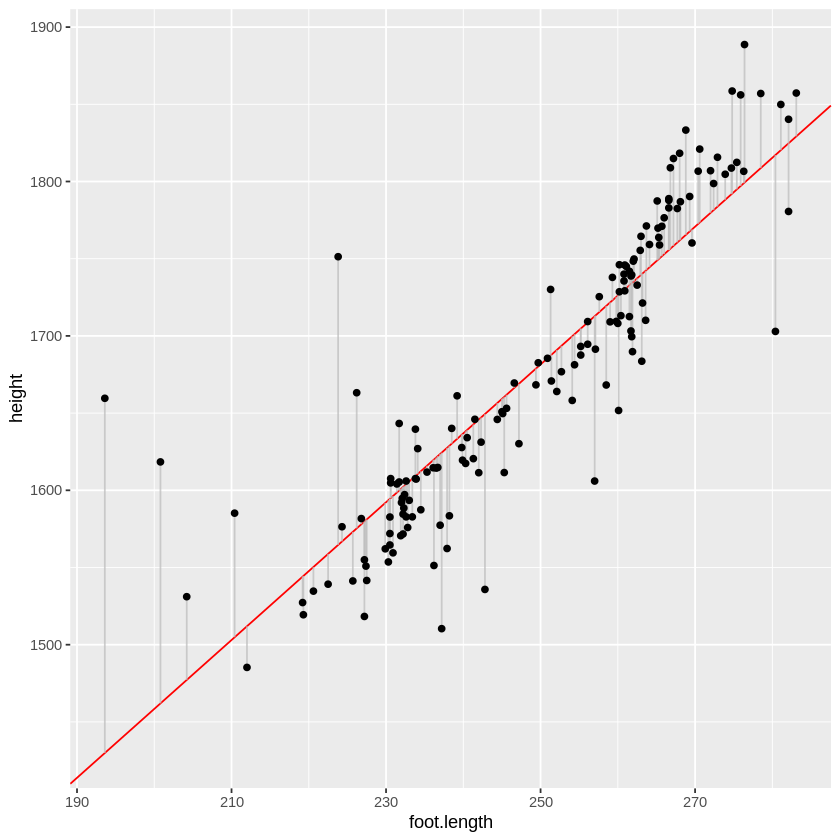

In [6]:
# Now, we can plot a model to see what we are working with visually.

intcpt <- coef(m1$finalModel)[1] # extract the intercept
slp <- coef(m1$finalModel)[2]    # extract the slope

ggplot(df, aes(x = foot.length, y = height))  + 
    geom_abline(intercept = intcpt, slope = slp, colour = "red")+
    geom_segment(aes(x=foot.length, xend=foot.length, y=height, yend=fitted.values(m1)), colour = "grey", alpha = .75) +
    geom_point()

Looking at the above, we can see how foot.length and height are related. It is very clear that there is a positive relationship and as foot length increases, so does height.

**Now to run the above off of the other variable**

In [7]:
frmla2 <- height ~ hand.length

In [8]:
m2 <- train(frmla2, df, method = "lm")
summary(m2)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-285.880  -21.640   -3.922   24.068  278.185 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 451.2686    55.4286   8.141 1.27e-13 ***
hand.length   6.1469     0.2772  22.172  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.9 on 153 degrees of freedom
Multiple R-squared:  0.7626,	Adjusted R-squared:  0.7611 
F-statistic: 491.6 on 1 and 153 DF,  p-value: < 2.2e-16


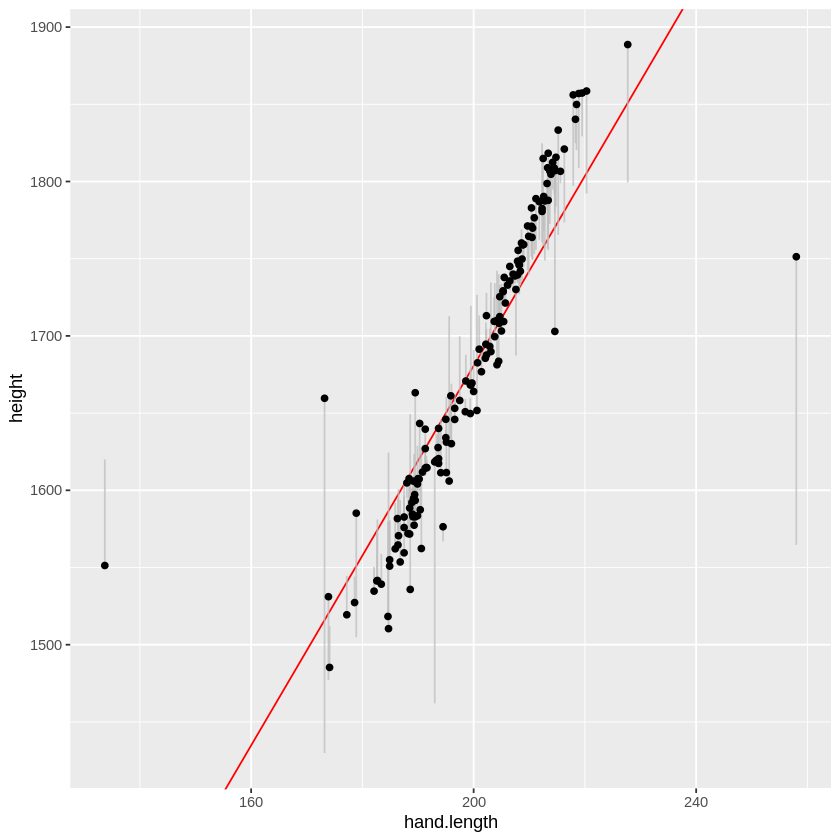

In [9]:
intcpt <- coef(m2$finalModel)[1] # extract the intercept
slp <- coef(m2$finalModel)[2]    # extract the slope

ggplot(df, aes(x = hand.length, y = height))  + 
    geom_abline(intercept = intcpt, slope = slp, colour = "red")+
    geom_segment(aes(x=hand.length, xend=hand.length, y=height, yend=fitted.values(m1)), colour = "grey", alpha = .75) +
    geom_point()

**The above only shows us the plotting in R, but we also need to separate the problem into training and testing sets**

In [14]:
# In the data, we have 155  rows. Let's make a training set based on ~60% of the data, or 100 elements.

# nrow(df)

set.seed(1)
train_ind <- sample(seq_len(nrow(df)), size = 100)

# df[train_ind,] == A list of the indices of the df set as a sample


Now, let's set up the training and testing sets

In [44]:
train_mod <- df[train_ind,]
test_mod <- df[-train_ind, ]

head(train_mod)
head(test_mod)

,gender,height,hand.length,foot.length
,<int>,<dbl>,<dbl>,<dbl>
42,1,1732.9,206.1,262.5
58,1,1856.1,217.9,275.9
88,2,1539.2,183.4,222.5
139,2,1627.0,191.3,234.1
31,1,1814.9,212.5,267.2
135,2,1617.4,193.7,240.3


,gender,height,hand.length,foot.length
,<int>,<dbl>,<dbl>,<dbl>
1,1,1760.2,208.6,269.6
5,1,1780.6,212.3,282.1
6,1,1818.3,213.4,268.0
7,1,1798.7,213.2,272.4
11,1,1804.7,213.9,273.9
12,1,1745.0,206.5,261.1


In [45]:
## Set up a formula using both hand.length and foot.length

frmla3 <- height ~ hand.length

In [55]:
m3 <- train(frmla3, train_mod, method = "lm")
summary(m3)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-286.712  -17.426   -2.631   22.173  147.759 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  437.163     69.701   6.272 9.66e-09 ***
hand.length    6.205      0.347  17.880  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.88 on 98 degrees of freedom
Multiple R-squared:  0.7654,	Adjusted R-squared:  0.763 
F-statistic: 319.7 on 1 and 98 DF,  p-value: < 2.2e-16


Our R-squared for this test model is 0.763, which is very similar to our original model using the full dataset.

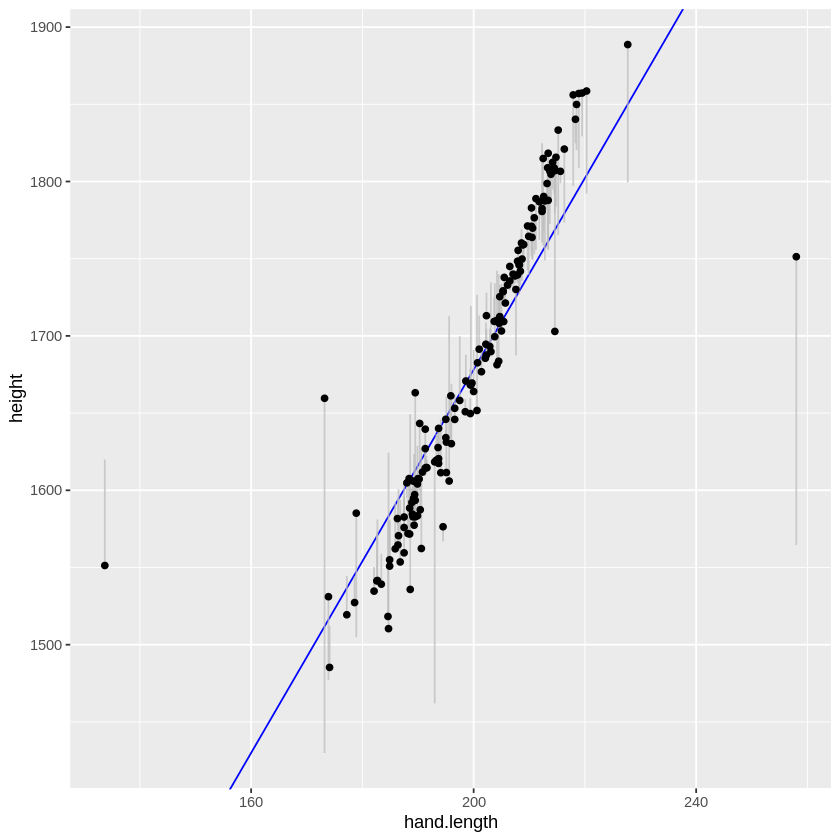

In [47]:
# Plotting the model

intcpt <- coef(m3$finalModel)[1] # extract the intercept
slp <- coef(m3$finalModel)[2]    # extract the slope

ggplot(df, aes(x = hand.length, y = height))  + 
    geom_abline(intercept = intcpt, slope = slp, colour = "blue")+
    geom_segment(aes(x=hand.length, xend=hand.length, y=height, yend=fitted.values(m1)), colour = "grey", alpha = .75) +
    geom_point()

In [61]:
df$pred<-predict(m3, newdata=df) # find the predicted values of the dataset mpg

head(df)

gender,height,hand.length,foot.length,pred
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1760.2,208.6,269.6,1731.493
1,1730.1,207.6,251.3,1725.288
1,1659.6,173.2,193.6,1511.841
1,1751.3,258.0,223.8,2038.012
1,1780.6,212.3,282.1,1754.451
1,1818.3,213.4,268.0,1761.276


Now we have a prediction column in the original df based on our m3 model.

# Save your notebook, then `File > Close and Halt`